## **Recommendation System**

E-commerce companies use recommendation systems to provide suggestions to the customers. They use item-item collaborative filtering, which scales to massive datasets and produces high quality recommendation systems in the real time. This project is a kind of an information filtering system which seeks to predict the "rating" or preferences which user is interested in.


Attribute Information:

● userId: Every user identified with a unique id

● productId: Every product identified with a unique id

● Rating: Rating of the corresponding product by the corresponding user

● timestamp: Time of the rating (ignore this column for this exercise)


In [1]:
#pip install "numpy<2.0" scikit-learn

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading dataset
ratings=pd.read_csv('ratings.csv')
ratings.tail()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
7824476,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824477,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824478,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824479,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200
7824480,A2G81TMIOIDEQQ,BT008V9J9U,5.0,1312675200


## EDA

In [4]:
ratings.shape

(7824481, 4)

In [5]:
# changing the column names to 'AKM1MP6P0OYPR into Userid' , '0132793040 into Productid' ,'5.0	into  Rating' and  '1365811200 into Timestamp'

ratings.rename(columns={'AKM1MP6P0OYPR': 'Userid', '0132793040': 'Productid', '5.0': 'Rating', '1365811200': 'Timestamp'}, inplace=True)
print(ratings.head())


           Userid   Productid  Rating   Timestamp
0  A2CX7LUOHB2NDG  0321732944     5.0  1341100800
1  A2NWSAGRHCP8N5  0439886341     1.0  1367193600
2  A2WNBOD3WNDNKT  0439886341     3.0  1374451200
3  A1GI0U4ZRJA8WN  0439886341     1.0  1334707200
4  A1QGNMC6O1VW39  0511189877     5.0  1397433600


In [6]:
# Copying the data to another DataFrame
df = ratings.copy()
df.head()

,Userid,Productid,Rating,Timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [7]:
df.shape

(7824481, 4)

As the dataset is very large and has 7,824,481 observations, it is not computationally possible to build a model using this. Moreover, many users have only rated a few products and also some products are rated by very few users. Hence, we can reduce the dataset by considering certain logical assumptions.

Here, we will be taking users who have given at least 50 ratings, and the products that have at least 5 ratings, as when we shop online we prefer to have some number of ratings of a product.

In [8]:
# Get the column containing the users
users = df.Userid

# Create a dictionary from users to their number of ratings
ratings_count = dict()

for user in users:

    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1


In [9]:
# users to have at least 50 ratings to be considered
RATINGS_CUTOFF = 50

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.Userid.isin(remove_users)]

In [10]:
# Get the column containing the products
prods = df.Productid

# Create a dictionary from products to their number of ratings
ratings_count = dict()

for prod in prods:

    # If we already have the product, just add 1 to its rating count
    if prod in ratings_count:
        ratings_count[prod] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[prod] = 1

In [11]:
# item to have at least 5 ratings to be considered
RATINGS_CUTOFF = 5

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df_final = df.loc[~ df.Productid.isin(remove_users)]

In [12]:
# Print a few rows of the imported dataset
df_final.head()

,Userid,Productid,Rating,Timestamp
1309,A3LDPF5FMB782Z,1400501466,5.0,1336003200
1321,A1A5KUIIIHFF4U,1400501466,1.0,1332547200
1334,A2XIOXRRYX0KZY,1400501466,3.0,1371686400
1450,AW3LX47IHPFRL,1400501466,5.0,1339804800
1455,A1E3OB6QMBKRYZ,1400501466,1.0,1350086400


In [13]:
# Check info again.
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65290 entries, 1309 to 7824426
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Userid     65290 non-null  object 
 1   Productid  65290 non-null  object 
 2   Rating     65290 non-null  float64
 3   Timestamp  65290 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.5+ MB


In [14]:
# Check the number of rows and columns
df_final.shape

(65290, 4)

In [15]:
# save df_final as a csv filr

df_final.to_csv('df_final.csv', index=False)


In [16]:
# Parse timestamp to readable datetime
df_final['Timestamp'] = pd.to_datetime(df_final['Timestamp'], unit='s')

# Check after parsing
print(df_final['Timestamp'].head())

1309   2012-05-03
1321   2012-03-24
1334   2013-06-20
1450   2012-06-16
1455   2012-10-13
Name: Timestamp, dtype: datetime64[ns]


In [17]:
# Create useful time features
df_final['year'] = df_final['Timestamp'].dt.year
df_final['month'] = df_final['Timestamp'].dt.month
df_final['day'] = df_final['Timestamp'].dt.day
df_final['weekday'] = df_final['Timestamp'].dt.day_name()

In [18]:
df_final.head()

,Userid,Productid,Rating,Timestamp,year,month,day,weekday
1309,A3LDPF5FMB782Z,1400501466,5.0,2012-05-03,2012,5,3,Thursday
1321,A1A5KUIIIHFF4U,1400501466,1.0,2012-03-24,2012,3,24,Saturday
1334,A2XIOXRRYX0KZY,1400501466,3.0,2013-06-20,2013,6,20,Thursday
1450,AW3LX47IHPFRL,1400501466,5.0,2012-06-16,2012,6,16,Saturday
1455,A1E3OB6QMBKRYZ,1400501466,1.0,2012-10-13,2012,10,13,Saturday


In [19]:
# Missing values
print("\nMissing Values:")
print(df_final.isnull().sum())


Missing Values:
Userid       0
Productid    0
Rating       0
Timestamp    0
year         0
month        0
day          0
weekday      0
dtype: int64


In [20]:
#Checking for Duplicate values
df_final.duplicated().sum()

0

In [21]:
# Basic statistics
print("\nBasic Statistics:")
print(df_final.describe())


Basic Statistics:
             Rating                      Timestamp          year  \
count  65290.000000                          65290  65290.000000   
mean       4.294808  2012-04-03 06:55:05.008423936   2011.758692   
min        1.000000            2000-04-25 00:00:00   2000.000000   
25%        4.000000            2011-03-31 00:00:00   2011.000000   
50%        5.000000            2012-11-06 00:00:00   2012.000000   
75%        5.000000            2013-09-10 00:00:00   2013.000000   
max        5.000000            2014-07-23 00:00:00   2014.000000   
std        0.988915                            NaN      1.954957   

              month           day  
count  65290.000000  65290.000000  
mean       6.463333     16.404472  
min        1.000000      1.000000  
25%        3.000000      9.000000  
50%        6.000000     17.000000  
75%       10.000000     24.000000  
max       12.000000     31.000000  
std        3.539358      8.731464  


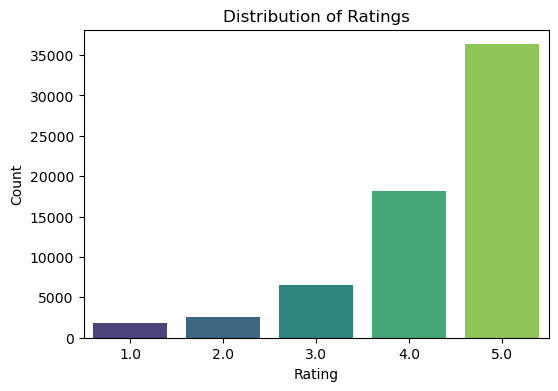

In [22]:
# Distribution of Ratings
plt.figure(figsize=(6,4))
sns.countplot(data=df_final, x='Rating', palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()



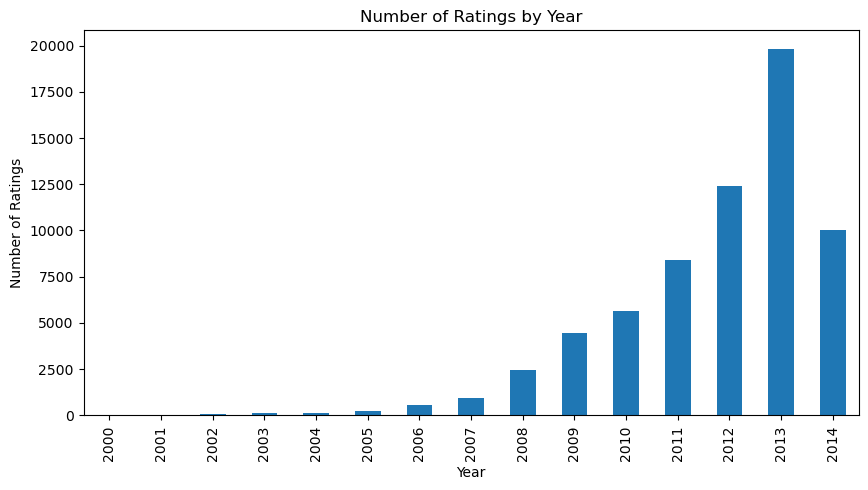

In [23]:
#  Number of Ratings Over Time
plt.figure(figsize=(10,5))
df_final['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.show()

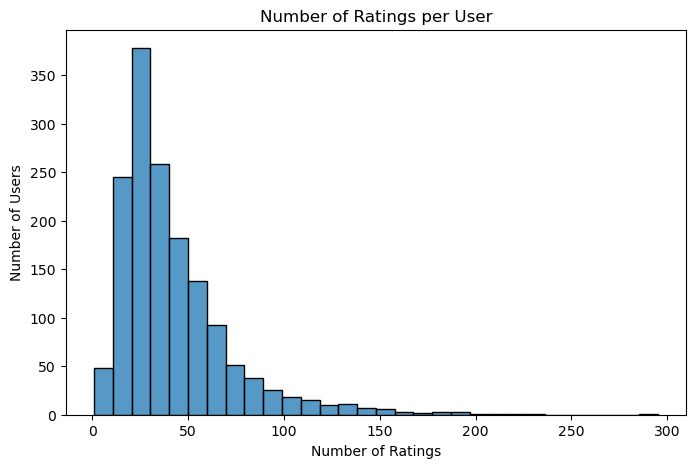

In [24]:
# Ratings per user
user_ratings_count = df_final.groupby('Userid').size()
plt.figure(figsize=(8,5))
sns.histplot(user_ratings_count, bins=30, kde=False)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()

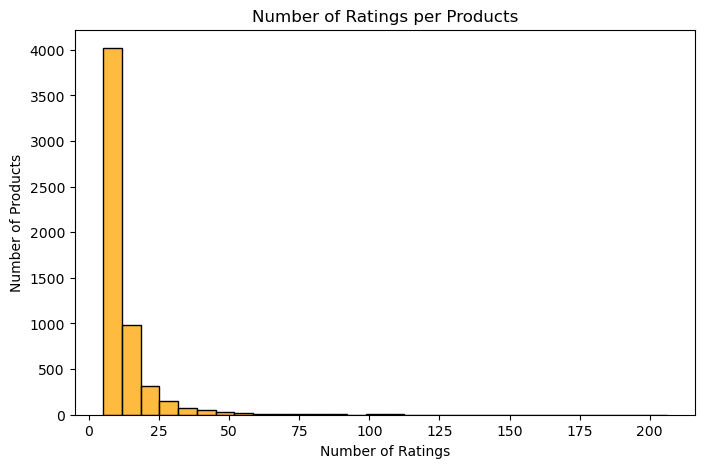

In [25]:
# Ratings per product
item_ratings_count = df_final.groupby('Productid').size()
plt.figure(figsize=(8,5))
sns.histplot(item_ratings_count, bins=30, kde=False, color='orange')
plt.title('Number of Ratings per Products')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Products')
plt.show()

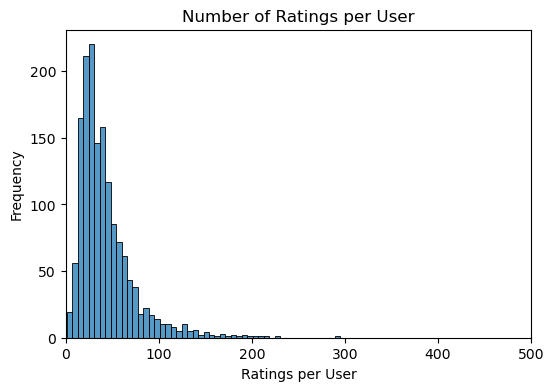

In [26]:
# 3.5 Users vs Number of Ratings
user_counts = df_final['Userid'].value_counts()
plt.figure(figsize=(6,4))
sns.histplot(user_counts, bins=50)
plt.title('Number of Ratings per User')
plt.xlabel('Ratings per User')
plt.ylabel('Frequency')
plt.xlim(0, 500)
plt.show()

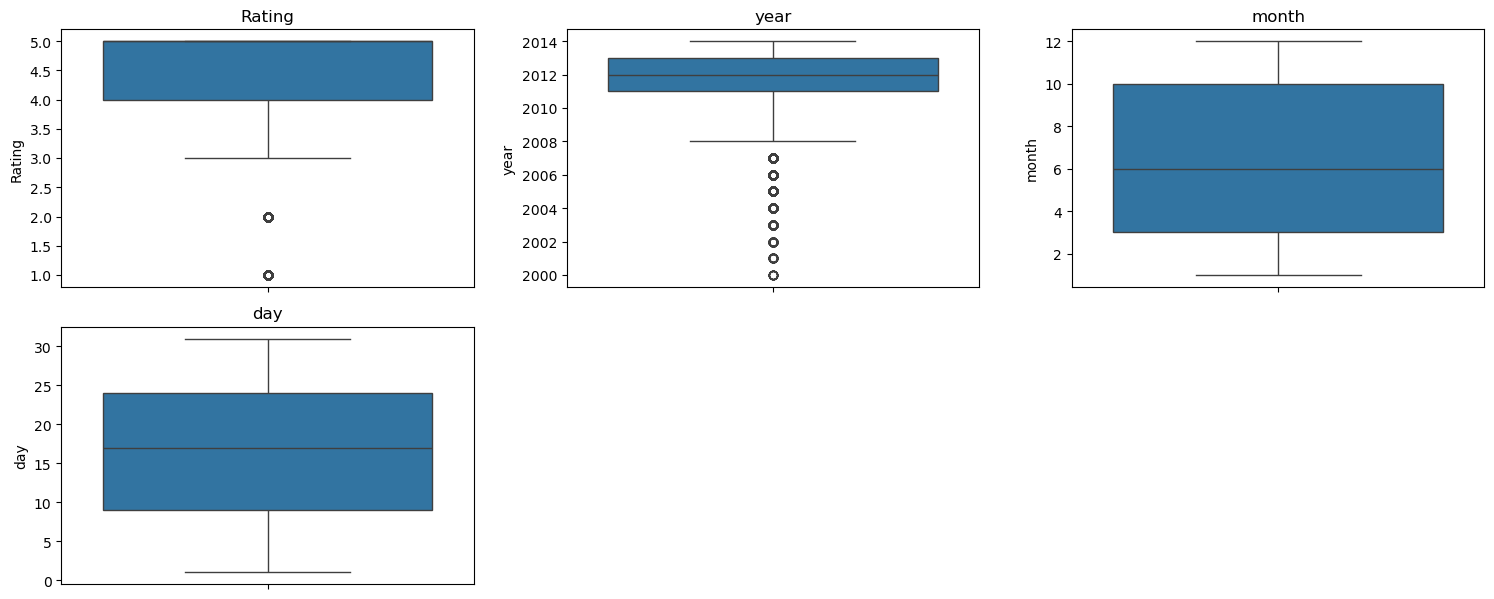

In [27]:
# boxplots of all numerical variables
plt.figure(figsize=(15, 12))
for i, col in enumerate(df_final.select_dtypes(include=np.number).columns):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=df_final[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [28]:
# remove the outliers from rating variable

# Calculate Q1, Q3, and IQR for the 'Rating' column.
Q1 = df_final['Rating'].quantile(0.25)
Q3 = df_final['Rating'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers.
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers.
df_final = df_final[~((df_final['Rating'] < lower_bound) | (df_final['Rating'] > upper_bound))]

# Display the DataFrame without outliers.
df_final


,Userid,Productid,Rating,Timestamp,year,month,day,weekday
1309,A3LDPF5FMB782Z,1400501466,5.0,2012-05-03,2012,5,3,Thursday
1334,A2XIOXRRYX0KZY,1400501466,3.0,2013-06-20,2013,6,20,Thursday
1450,AW3LX47IHPFRL,1400501466,5.0,2012-06-16,2012,6,16,Saturday
1484,A19N3S7CBSU6O7,1400501466,5.0,2011-12-01,2011,12,1,Thursday
2081,A2ZR3YTMEEIIZ4,1400532655,5.0,2011-03-16,2011,3,16,Wednesday
...,...,...,...,...,...,...,...,...
7824422,A34BZM6S9L7QI4,B00LGQ6HL8,5.0,2014-07-17,2014,7,17,Thursday
7824423,A1G650TTTHEAL5,B00LGQ6HL8,5.0,2014-07-15,2014,7,15,Tuesday
7824424,A25C2M3QF9G7OQ,B00LGQ6HL8,5.0,2014-07-17,2014,7,17,Thursday
7824425,A1E1LEVQ9VQNK,B00LGQ6HL8,5.0,2014-07-18,2014,7,18,Friday


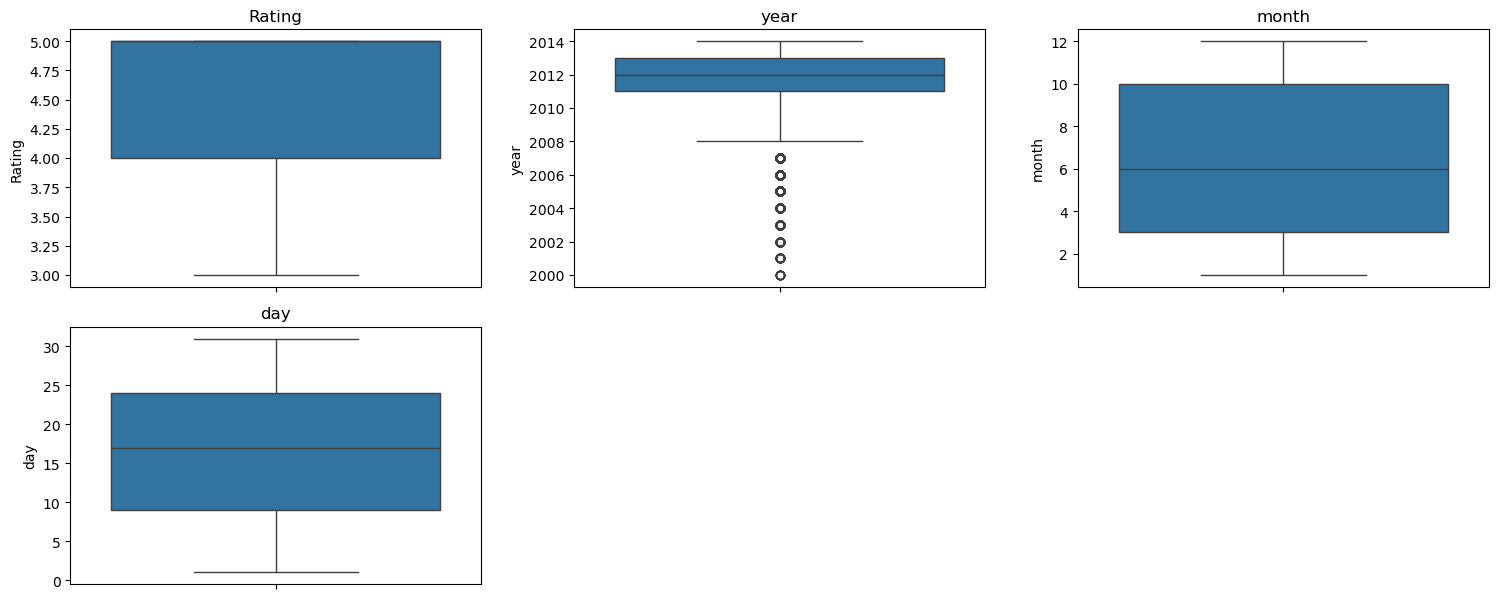

In [29]:
# boxplots of all numerical variables
plt.figure(figsize=(15, 12))
for i, col in enumerate(df_final.select_dtypes(include=np.number).columns):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=df_final[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [30]:
# Top 10 rated items
top_rated_items = df_final.groupby('Productid')['Rating'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Items by Average Rating:")
print(top_rated_items)


Top 10 Items by Average Rating:
Productid
B00LGQ6HL8    5.0
B00B4QESVQ    5.0
B004V3KCJG    5.0
B001BTG3OQ    5.0
B003CH1SJU    5.0
B003CJTR8M    5.0
B00FZ9SMVU    5.0
B00081A2DQ    5.0
B003CK10DG    5.0
B00B1K6D5Y    5.0
Name: Rating, dtype: float64


### DATA PREPROCESSING

In [31]:
# Prepare Data for Clustering
user_item_matrix = df_final.pivot_table(index='Userid', columns='Productid', values='Rating').fillna(0)

In [32]:
user_item_matrix

Productid,1400501466,1400532655,1400599997,9983891212,B00000DM9W,B00000J1V5,B00000JDF5,B00000JDF6,B00000K135,B00000K4KH,...,B00KNM763E,B00KONCDVM,B00KVNY2KA,B00KXAFYZS,B00KYMCJF8,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L3YHF6O,B00LGQ6HL8
Userid,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZBXKUH4AIW3X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZCE11PSTCH1L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZMY6E8B52L2T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,5.0,0.0,5.0,5.0,5.0,0.0,0.0


In [33]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
user_item_scaled = scaler.fit_transform(user_item_matrix)

In [34]:
user_item_scaled

array([[-0.05012547, -0.05616779, -0.05083631, ..., -0.09100811,
        -0.09581403, -0.05709161],
       [-0.05012547, -0.05616779, -0.05083631, ..., -0.09100811,
        -0.09581403, -0.05709161],
       [-0.05012547, -0.05616779, -0.05083631, ..., -0.09100811,
        -0.09581403, -0.05709161],
       ...,
       [-0.05012547, -0.05616779, -0.05083631, ..., 12.19508669,
        -0.09581403, -0.05709161],
       [-0.05012547, -0.05616779, -0.05083631, ..., -0.09100811,
        -0.09581403, -0.05709161],
       [-0.05012547, -0.05616779, -0.05083631, ..., -0.09100811,
        -0.09581403, -0.05709161]])

### CLUSTERING MODELS

In [35]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

In [36]:
# Finding the Distance using Euclidean Distance with Complete (maximum) linkage
z = linkage(user_item_scaled, method = "complete", metric = "euclidean")

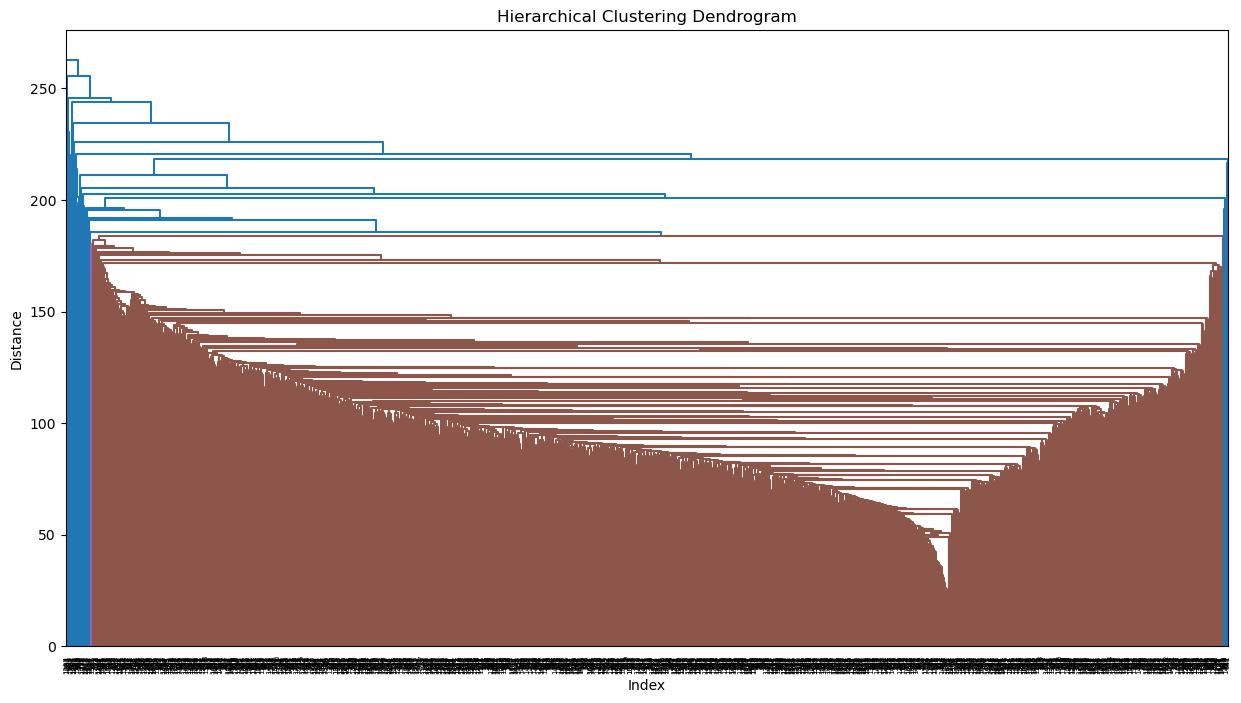

In [37]:
# Now we plot the dendogram
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, leaf_rotation = 90,  leaf_font_size = 5 )
plt.show()

In [38]:
#  Clustering Models & Silhouette Comparison

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
silhouette_scores = {}

In [39]:
# Agglomerative Clustering (single linkage)
agglo_s = AgglomerativeClustering(n_clusters=2,linkage = 'single')
agglo_label_s = agglo_s.fit_predict(user_item_scaled)
agglo_score_s = silhouette_score(user_item_scaled, agglo_label_s)
silhouette_scores['Agglomerative_single (k=2)'] = agglo_score_s



In [40]:
# Agglomerative Clustering (complete linkage)
agglo_c = AgglomerativeClustering(n_clusters=2,linkage = 'complete')
agglo_labels_c = agglo_c.fit_predict(user_item_scaled)
agglo_score_c = silhouette_score(user_item_scaled, agglo_labels_c)
silhouette_scores['Agglomerative_complete (k=2)'] = agglo_score_c

In [41]:
# Agglomerative Clustering (average linkage)
agglo_a = AgglomerativeClustering(n_clusters=2,linkage = 'average')
agglo_labels_a = agglo_a.fit_predict(user_item_scaled)
agglo_score_a = silhouette_score(user_item_scaled, agglo_labels_a)
silhouette_scores['Agglomerative_average (k=2)'] = agglo_score_a

In [42]:
print(type(user_item_scaled))           # Should be <class 'numpy.ndarray'>
print(user_item_scaled.dtype)           # Should be float32 or float64
print(np.isnan(user_item_scaled).any()) 

<class 'numpy.ndarray'>
float64
False


In [43]:
#user_item_scaled = user_item_scaled.astype(float)
#user_item_scaled = np.nan_to_num(user_item_scaled)

In [44]:
#pip install --upgrade --force-reinstall scikit-learn joblib

In [45]:
# --- KMeans ---
kmeans = KMeans(n_clusters=2, random_state=42,n_init=10)
kmeans_labels = kmeans.fit_predict(user_item_scaled)
kmeans_score = silhouette_score(user_item_scaled, kmeans_labels)
silhouette_scores['KMeans (k=2)'] = kmeans_score

In [46]:
from sklearn.metrics import silhouette_score

scores= []
for i in range(2,11):
    from sklearn.cluster import KMeans
    cluster = KMeans(n_clusters=i, n_init=20)
    # Store the cluster labels in a separate variable
    cluster_labels = cluster.fit_predict(user_item_scaled)
    # Calculate and append the silhouette score for the current cluster labels
    scores.append(silhouette_score(user_item_scaled, cluster_labels))

# Print the Silhouette score for each number of clusters
print("Silhouette scores:", scores)


best_score = max(scores)
best_n_clusters = scores.index(best_score) + 2  # Add 2 because range starts from 2
print(f"Best Silhouette score: {best_score:.2f} for n_clusters = {best_n_clusters}")

Silhouette scores: [0.2822493821979451, 0.33146683257946774, -0.022409183966007527, -0.011002669608941064, 0.21324564294860948, -0.08742378914753329, 0.07852809183177471, 0.050391124886591664, 0.07968168673984818]
Best Silhouette score: 0.33 for n_clusters = 3


In [47]:
# --- DBSCAN ---
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(user_item_scaled)
if len(set(dbscan_labels)) > 1:
    dbscan_score = silhouette_score(user_item_scaled, dbscan_labels)
    silhouette_scores['DBSCAN'] = dbscan_score
else:
    silhouette_scores['DBSCAN'] = -1  # Means clustering was not meaningful



In [48]:
# Show Silhouette Scores
print("\nSilhouette Scores for Different Clustering Models:")
for model_name, score in silhouette_scores.items():
    print(f"{model_name}: {round(score,2):.2f}")


Silhouette Scores for Different Clustering Models:
Agglomerative_single (k=2): 0.51
Agglomerative_complete (k=2): 0.51
Agglomerative_average (k=2): 0.51
KMeans (k=2): 0.34
DBSCAN: -1.00


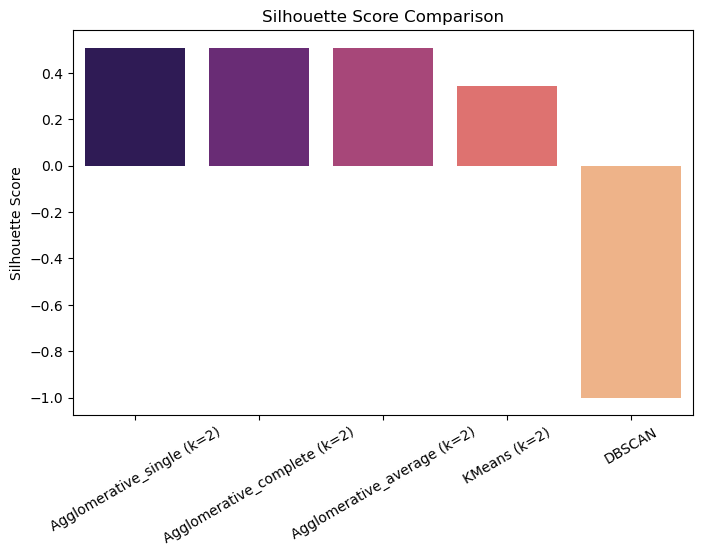

In [49]:
# Bar plot comparison
plt.figure(figsize=(8,5))
sns.barplot(x=list(silhouette_scores.keys()), y=list(silhouette_scores.values()), palette='magma')
plt.title('Silhouette Score Comparison')
plt.ylabel('Silhouette Score')
plt.xticks(rotation=30)
plt.show()



In [50]:
# Choose best model
best_model_name = max(silhouette_scores, key=silhouette_scores.get)
print(f"\n✅ Best clustering model based on Silhouette Score: {best_model_name}")


✅ Best clustering model based on Silhouette Score: Agglomerative_single (k=2)


In [51]:
# Use the best model to assign clusters

final_labels = agglo_label_s
user_item_matrix['cluster'] = final_labels


In [52]:

# 6. Recommendation System Based on Clusters

def recommend_items(Userid, user_item_matrix, Rating, top_n=5):
    # Get user's cluster
    cluster_label = user_item_matrix.loc[Userid, 'cluster']

    # Find other users in same cluster
    similar_users = user_item_matrix[user_item_matrix['cluster'] == cluster_label].index.tolist()

    # Find items rated highly by similar users
    similar_users_ratings = Rating[Rating['Userid'].isin(similar_users)]

    # Average ratings for items
    item_scores = similar_users_ratings.groupby('Productid')['Rating'].mean()

    # Recommend top N items
    recommended_items = item_scores.sort_values(ascending=False).head(top_n)

    return recommended_items

In [53]:
df_final.head()

,Userid,Productid,Rating,Timestamp,year,month,day,weekday
1309,A3LDPF5FMB782Z,1400501466,5.0,2012-05-03,2012,5,3,Thursday
1334,A2XIOXRRYX0KZY,1400501466,3.0,2013-06-20,2013,6,20,Thursday
1450,AW3LX47IHPFRL,1400501466,5.0,2012-06-16,2012,6,16,Saturday
1484,A19N3S7CBSU6O7,1400501466,5.0,2011-12-01,2011,12,1,Thursday
2081,A2ZR3YTMEEIIZ4,1400532655,5.0,2011-03-16,2011,3,16,Wednesday


In [54]:
# Example Recommendation
Userid = 'A3LDPF5FMB782Z'  # Example user
recommendations = recommend_items(Userid=Userid, user_item_matrix=user_item_matrix, Rating=df_final, top_n=10)

print(f"\nRecommended Items for User {Userid}:")
print(recommendations)


Recommended Items for User A3LDPF5FMB782Z:
Productid
B00LGQ6HL8    5.0
B001PS9UKW    5.0
B001TDL34Y    5.0
B00067TTY0    5.0
B001RNOHDU    5.0
B001RHJ60K    5.0
B001RCTA8I    5.0
B009APBY0G    5.0
B001PS9E5I    5.0
B00FW6T36Y    5.0
Name: Rating, dtype: float64


### Recommendation model

In [55]:
df_final.head()

,Userid,Productid,Rating,Timestamp,year,month,day,weekday
1309,A3LDPF5FMB782Z,1400501466,5.0,2012-05-03,2012,5,3,Thursday
1334,A2XIOXRRYX0KZY,1400501466,3.0,2013-06-20,2013,6,20,Thursday
1450,AW3LX47IHPFRL,1400501466,5.0,2012-06-16,2012,6,16,Saturday
1484,A19N3S7CBSU6O7,1400501466,5.0,2011-12-01,2011,12,1,Thursday
2081,A2ZR3YTMEEIIZ4,1400532655,5.0,2011-03-16,2011,3,16,Wednesday


In [56]:
df_final.shape

(60923, 8)

In [57]:
# Create User-Item Matrix
user_item_matrix = df_final.pivot_table(index='Userid', columns='Productid', values='Rating').fillna(0)

# View the matrix
user_item_matrix.head()


Productid,1400501466,1400532655,1400599997,9983891212,B00000DM9W,B00000J1V5,B00000JDF5,B00000JDF6,B00000K135,B00000K4KH,...,B00KNM763E,B00KONCDVM,B00KVNY2KA,B00KXAFYZS,B00KYMCJF8,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L3YHF6O,B00LGQ6HL8
Userid,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
# Convert User-Item Matrix to Sparse format (for memory efficiency)
#from scipy.sparse import csr_matrix

#user_item_sparse = csr_matrix(user_item_matrix)

#print(user_item_sparse.shape)


In [59]:
# Calculate Cosine Similarity between users
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(user_item_matrix)

print(user_similarity.shape)


(1539, 1539)


In [60]:
# Create a DataFrame to better visualize User Similarity
user_similarity_df = pd.DataFrame(user_similarity,
                                  index=user_item_matrix.index,
                                  columns=user_item_matrix.index)

user_similarity_df.head()


Userid,A100UD67AHFODS,A100WO06OQR8BQ,A105S56ODHGJEK,A105TOJ6LTVMBG,A10AFVU66A79Y1,A10H24TDLK2VDP,A10NMELR4KX0J6,A10O7THJ2O20AG,A10PEXB6XAQ5XF,A10X9ME6R66JDX,...,AYOTEJ617O60K,AYP0YPLSP9ISM,AZ515FFZ7I2P7,AZ8XSDMIX04VJ,AZAC8O310IK4E,AZBXKUH4AIW3X,AZCE11PSTCH1L,AZMY6E8B52L2T,AZNUHQSHZHSUE,AZOK5STV85FBJ
Userid,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,1.000000,0.021334,0.000000,0.031196,0.019799,0.000000,0.056098,0.068164,0.019819,0.043333,...,0.061993,0.0,0.000000,0.056509,0.061613,0.000000,0.0,0.074956,0.029883,0.040966
A100WO06OQR8BQ,0.021334,1.000000,0.018792,0.030694,0.014610,0.015018,0.027598,0.035769,0.026521,0.000000,...,0.033886,0.0,0.022563,0.000000,0.029937,0.035996,0.0,0.029500,0.000000,0.000000
A105S56ODHGJEK,0.000000,0.018792,1.000000,0.000000,0.027251,0.073529,0.000000,0.000000,0.039281,0.000000,...,0.000000,0.0,0.042665,0.000000,0.013401,0.000000,0.0,0.000000,0.032905,0.000000
A105TOJ6LTVMBG,0.031196,0.030694,0.000000,1.000000,0.000000,0.000000,0.040356,0.000000,0.000000,0.000000,...,0.089192,0.0,0.022754,0.000000,0.027360,0.042109,0.0,0.078510,0.000000,0.000000
A10AFVU66A79Y1,0.019799,0.014610,0.027251,0.000000,1.000000,0.027222,0.000000,0.000000,0.000000,0.024731,...,0.000000,0.0,0.025272,0.064500,0.060775,0.000000,0.0,0.000000,0.000000,0.000000


In [61]:
# Recommendation function based on similar users
def recommend_items(Userid, num_recommendations=5):
    if Userid not in user_similarity_df.index:
        print("User ID not found.")
        return []

    # Find similar users (excluding the user itself)
    similar_users = user_similarity_df[Userid].sort_values(ascending=False).drop(Userid).head(5)

    # Fetch items rated by similar users
    similar_users_ids = similar_users.index.tolist()
    similar_users_ratings = df_final[df_final['Userid'].isin(similar_users_ids)]

    # Items already rated by the target user
    user_rated_items = df_final[df_final['Userid'] == user_id]['Productid'].tolist()

    # Filter out items the user has already rated
    recommendations = similar_users_ratings[~similar_users_ratings['Productid'].isin(user_rated_items)]

    # Take the highest rated items from similar users
    top_recommendations = recommendations.groupby('Productid')['Rating'].mean().sort_values(ascending=False).head(num_recommendations)

    return top_recommendations.index.tolist()


In [62]:
# Get recommendations for a user
user_id = 'A3LDPF5FMB782Z'  # Example user ID
recommendations = recommend_items(Userid, num_recommendations=10)

#print(f"Recommended item IDs for User {user_id}: {recommendations}")
print(f"\nRecommended Items for User {Userid}:")
print(recommendations)



Recommended Items for User A3LDPF5FMB782Z:
['B002JCSV5I', 'B002ZIMEMW', 'B001PKTR76', 'B001VO4MOY', 'B002HEWA28', 'B002J9HBIO', 'B002PX9BX2', 'B002WE6D44', 'B003VAGXWK', 'B001EPVOQY']


## LIGHTGBM AND XGBOOST

In [ ]:
#!pip install lightgbm

In [ ]:
#!pip install "numpy<2"

In [63]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import lightgbm as lgb
import xgboost as xgb


In [64]:
# Loading dataset
df_final = pd.read_csv('df_final.csv')
df_final.head()

,Userid,Productid,Rating,Timestamp
0,A3LDPF5FMB782Z,1400501466,5.0,1336003200
1,A1A5KUIIIHFF4U,1400501466,1.0,1332547200
2,A2XIOXRRYX0KZY,1400501466,3.0,1371686400
3,AW3LX47IHPFRL,1400501466,5.0,1339804800
4,A1E3OB6QMBKRYZ,1400501466,1.0,1350086400


In [65]:
# Convert 'Timestamp' to datetime
df_final['Timestamp'] = pd.to_datetime(df_final['Timestamp'], unit='s', errors='coerce')

In [66]:
# Create additional time-based features
df_final['year'] = df_final['Timestamp'].dt.year
df_final['month'] = df_final['Timestamp'].dt.month
df_final['day'] = df_final['Timestamp'].dt.day
df_final['weekday'] = df_final['Timestamp'].dt.weekday

In [67]:
# Create the 'liked' target (binary)
df_final['liked'] = df_final['Rating'].apply(lambda x: 1 if x >= 3 else 0)

In [73]:
df_final.head()

,Userid,Productid,Rating,Timestamp,year,month,day,weekday,liked
0,1050,0,5.0,2012-05-03,2012,5,3,3,1
1,125,0,1.0,2012-03-24,2012,3,24,5,0
2,785,0,3.0,2013-06-20,2013,6,20,3,1
3,1495,0,5.0,2012-06-16,2012,6,16,5,1
4,164,0,1.0,2012-10-13,2012,10,13,5,0


In [74]:
# label encode categorical variables

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through the columns 'Sex' and 'Embarked'
for column in ['Userid', 'Productid']:
    # Fit and transform the column using LabelEncoder
    df_final[column] = le.fit_transform(df_final[column])
# Print the updated DataFrame
df_final.head()

,Userid,Productid,Rating,Timestamp,year,month,day,weekday,liked
0,1050,0,5.0,2012-05-03,2012,5,3,3,1
1,125,0,1.0,2012-03-24,2012,3,24,5,0
2,785,0,3.0,2013-06-20,2013,6,20,3,1
3,1495,0,5.0,2012-06-16,2012,6,16,5,1
4,164,0,1.0,2012-10-13,2012,10,13,5,0


In [75]:
# Define features and target
X = df_final[['Userid', 'Productid', 'year', 'month', 'day', 'weekday']]
y = df_final['liked']

In [76]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (52232, 6)
Shape of X_test: (13058, 6)


In [77]:
# Initialize LightGBM model
lgbm_model = lgb.LGBMClassifier(random_state=42)

# Train LightGBM model
lgbm_model.fit(X_train, y_train)

# Predict
y_pred_lgbm = lgbm_model.predict(X_test)
y_proba_lgbm = lgbm_model.predict_proba(X_test)[:,1]

# Evaluate LightGBM
print("\n LightGBM Metrics:")
print("Accuracy:", (round(accuracy_score(y_test, y_pred_lgbm),2)))
print("Precision:", (round(precision_score(y_test, y_pred_lgbm),2)))
print("Recall:", (round(recall_score(y_test, y_pred_lgbm),2)))
print("F1 Score:", (round(f1_score(y_test, y_pred_lgbm),2)))
print("ROC AUC Score:", (round(roc_auc_score(y_test, y_proba_lgbm),2)))


[LightGBM] [Info] Number of positive: 48752, number of negative: 3480
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 578
[LightGBM] [Info] Number of data points in the train set: 52232, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.933374 -> initscore=2.639714
[LightGBM] [Info] Start training from score 2.639714

 LightGBM Metrics:
Accuracy: 0.93
Precision: 0.93
Recall: 1.0
F1 Score: 0.96
ROC AUC Score: 0.59


In [78]:
# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train XGBoost model
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:,1]

# Evaluate XGBoost
print("\n XGBoost Metrics:")
print("Accuracy:", (round(accuracy_score(y_test, y_pred_xgb),2)))
print("Precision:", (round(precision_score(y_test, y_pred_xgb),2)))
print("Recall:", (round(recall_score(y_test, y_pred_xgb),2)))
print("F1 Score:", (round(f1_score(y_test, y_pred_xgb),2)))
print("ROC AUC Score:", (round(roc_auc_score(y_test, y_proba_xgb),2)))



 XGBoost Metrics:
Accuracy: 0.93
Precision: 0.93
Recall: 1.0
F1 Score: 0.96
ROC AUC Score: 0.6


In [79]:
df_final.head()

,Userid,Productid,Rating,Timestamp,year,month,day,weekday,liked
0,1050,0,5.0,2012-05-03,2012,5,3,3,1
1,125,0,1.0,2012-03-24,2012,3,24,5,0
2,785,0,3.0,2013-06-20,2013,6,20,3,1
3,1495,0,5.0,2012-06-16,2012,6,16,5,1
4,164,0,1.0,2012-10-13,2012,10,13,5,0


In [80]:
# EXAMPLE RECCOMENDATIONS (lgb)

import pandas as pd
import lightgbm as lgb

interaction_data = pd.read_csv('df_final.csv') 

# Create user-product pairs for prediction
user_id = 'A3LDPF5FMB782Z' 

# Prepare product features 
unique_products = interaction_data['Productid'].unique()

# Create user-product pair DataFrame for prediction
user_product_pairs = pd.DataFrame({'Productid': unique_products})
user_product_pairs['Userid'] = user_id
user_product_pairs['Timestamp'] = '2024-01-01'  # Dummy timestamp if needed

# Encode Userid and Productid same as model training
from sklearn.preprocessing import LabelEncoder

# Reload encoders or fit new ones based on training data
le_user = LabelEncoder()
le_product = LabelEncoder()

# Fit encoders on full dataset
le_user.fit(interaction_data['Userid'])
le_product.fit(interaction_data['Productid'])

user_product_pairs['Userid_enc'] = le_user.transform(user_product_pairs['Userid'])
user_product_pairs['Productid_enc'] = le_product.transform(user_product_pairs['Productid'])

# Prepare feature matrix
X_new = user_product_pairs[['Userid_enc', 'Productid_enc']]
X_new['year'] = pd.to_datetime(user_product_pairs['Timestamp']).dt.year
X_new['month'] = pd.to_datetime(user_product_pairs['Timestamp']).dt.month
X_new['day'] = pd.to_datetime(user_product_pairs['Timestamp']).dt.day
X_new['weekday'] = pd.to_datetime(user_product_pairs['Timestamp']).dt.weekday

# Predict ratings for each product
y_pred = lgbm_model.predict(X_new)

# Add predictions to the DataFrame
user_product_pairs['PredictedRating'] = y_pred

# Sort products by predicted rating
user_product_pairs_sorted = user_product_pairs.sort_values(by='PredictedRating', ascending=False)

# Recommend top N products
top_n_recommended_products = user_product_pairs_sorted[['Productid', 'PredictedRating']].head(10)

print(top_n_recommended_products)


       Productid  PredictedRating
0     1400501466                1
3822  B006K55662                1
3798  B006FNCWSY                1
3797  B006FLENJC                1
3796  B006EWUO22                1
3795  B006EKIQYM                1
3794  B006DY3CRK                1
3793  B006DY3C5W                1
3792  B006DUDWXI                1
3791  B006DLP7BM                1


In [81]:
# EXAMPLE RECCOMENDATIONS (xgb)

import pandas as pd
import xgboost as xgb

# Load your interaction data
interaction_data = pd.read_csv('df_final.csv')  

#  Create user-product pairs for prediction

user_id = 'A3LDPF5FMB782Z' 

#  Prepare product features
unique_products = interaction_data['Productid'].unique()

# Create user-product pair DataFrame for prediction
user_product_pairs = pd.DataFrame({'Productid': unique_products})
user_product_pairs['Userid'] = user_id
user_product_pairs['Timestamp'] = '2024-01-01'  # Dummy timestamp if needed

# Encode Userid and Productid same as model training
from sklearn.preprocessing import LabelEncoder

# Reload encoders or fit new ones based on training data
le_user = LabelEncoder()
le_product = LabelEncoder()

# Fit encoders on full dataset 
le_user.fit(interaction_data['Userid'])
le_product.fit(interaction_data['Productid'])

user_product_pairs['Userid_enc'] = le_user.transform(user_product_pairs['Userid'])
user_product_pairs['Productid_enc'] = le_product.transform(user_product_pairs['Productid'])

# Prepare feature matrix
X_new = user_product_pairs[['Userid_enc', 'Productid_enc']]
X_new['year'] = pd.to_datetime(user_product_pairs['Timestamp']).dt.year
X_new['month'] = pd.to_datetime(user_product_pairs['Timestamp']).dt.month
X_new['day'] = pd.to_datetime(user_product_pairs['Timestamp']).dt.day
X_new['weekday'] = pd.to_datetime(user_product_pairs['Timestamp']).dt.weekday

# Rename columns to match training data
X_new = X_new.rename(columns={'Userid_enc': 'Userid', 'Productid_enc': 'Productid'})

# Reorder columns to match training data
X_new = X_new[['Userid', 'Productid', 'year', 'month', 'day', 'weekday']]

# Predict ratings for each product
y_pred = xgb_model.predict(X_new)

# Add predictions to the DataFrame
user_product_pairs['PredictedRating'] = y_pred

# Sort products by predicted rating
user_product_pairs_sorted = user_product_pairs.sort_values(by='PredictedRating', ascending=False)

#  Recommend top N products
top_n_recommended_products = user_product_pairs_sorted[['Productid', 'PredictedRating']].head(10)

print(top_n_recommended_products)


       Productid  PredictedRating
0     1400501466                1
3822  B006K55662                1
3798  B006FNCWSY                1
3797  B006FLENJC                1
3796  B006EWUO22                1
3795  B006EKIQYM                1
3794  B006DY3CRK                1
3793  B006DY3C5W                1
3792  B006DUDWXI                1
3791  B006DLP7BM                1
